# EDA

Импортируем библиотеки и прописываем пути, устанавливаем random_state.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
PATH_COVERS = 'data/raw/covers.json'
PATH_LYRICS = 'data/raw/lyrics.json'
PATH_META = 'data/raw/meta.json'

RANDOM_STATE = 54321

## Изучение датасета covers 

Изучим данные в датасете covers данный датасет содержит следующие столбцы  
- track_id - уникальный идентификатор трека;
- track_remake_type - метка, присвоенная редакторами. Может принимать значения ORIGINAL и COVER;
- original_track_id - уникальный идентификатор исходного трека.

In [3]:
df_covers = pd.read_json(PATH_COVERS, lines=True)
df_covers.head()

,original_track_id,track_id,track_remake_type
0,eeb69a3cb92300456b6a5f4162093851,eeb69a3cb92300456b6a5f4162093851,ORIGINAL
1,fe7ee8fc1959cc7214fa21c4840dff0a,fe7ee8fc1959cc7214fa21c4840dff0a,ORIGINAL
2,cd89fef7ffdd490db800357f47722b20,cd89fef7ffdd490db800357f47722b20,ORIGINAL
3,995665640dc319973d3173a74a03860c,995665640dc319973d3173a74a03860c,ORIGINAL
4,None,d6288499d0083cc34e60a077b7c4b3e1,COVER


Выведем информацию по датасету

In [4]:
df_covers.shape

(71597, 3)

In [5]:
df_covers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71597 entries, 0 to 71596
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   original_track_id  4821 non-null   object
 1   track_id           71597 non-null  object
 2   track_remake_type  71597 non-null  object
dtypes: object(3)
memory usage: 1.6+ MB


У нас 71597 записей при этом в id оригинальных треков есть много пропусков

Посмотрим на соотношение оригинальных и версий и каверов в полном датасете

In [6]:
df_group = df_covers.groupby('track_remake_type')['track_id'].agg('count').reset_index()

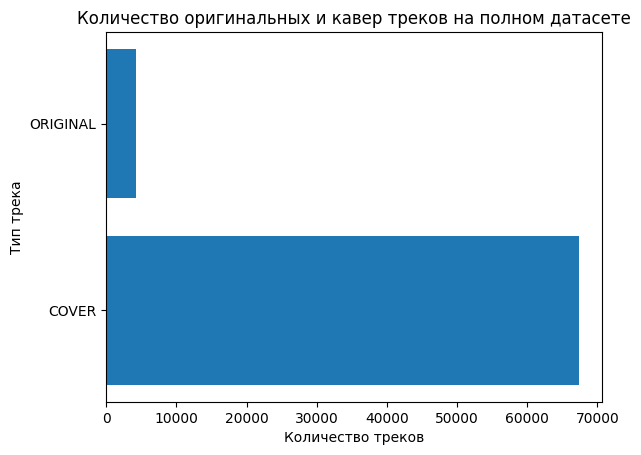

In [7]:
plt.title('Количество оригинальных и кавер треков на полном датасете')
plt.barh(df_group['track_remake_type'], df_group['track_id'])
plt.xlabel('Количество треков')
plt.ylabel('Тип трека')
plt.show()

Посмотрим на соотношение оригинальных и версий и каверов в датасете без пропусков

In [8]:
df_group = df_covers.dropna().groupby('track_remake_type')['track_id'].agg('count').reset_index()

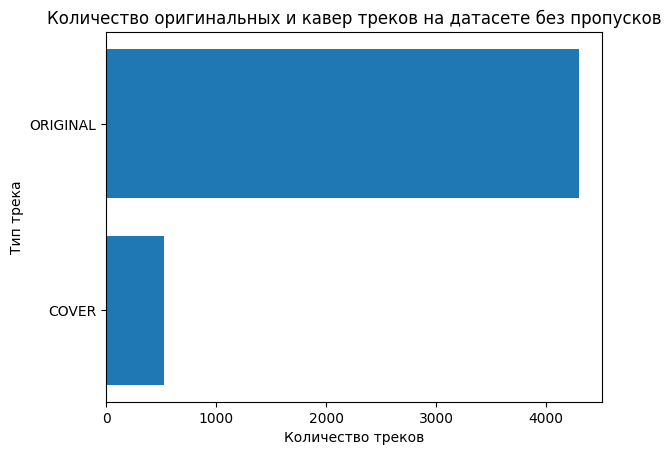

In [9]:
plt.title('Количество оригинальных и кавер треков на датасете без пропусков')
plt.barh(df_group['track_remake_type'], df_group['track_id'])
plt.xlabel('Количество треков')
plt.ylabel('Тип трека')
plt.show()

Посмотрим сколько треков имеют не только ссылку на оригинальный id, но и сам трек находится в выборке

In [10]:
df_covers_copy = df_covers.copy(deep=True)
df = df_covers[['track_id']].merge(df_covers_copy, left_on='track_id', right_on='original_track_id')
df[df['track_remake_type']=='COVER'].shape[0]

297

Всего у нас 297 таких треков, что учитывая будущую размерность векторизированных данных очень мало. Однако это единственные размеченные данные с которыми мы можем корректно работать и в дальнейшем оценивать качество нашей модели.

In [11]:
df_covers[df_covers['track_remake_type']=='COVER'].info()

<class 'pandas.core.frame.DataFrame'>
Index: 67304 entries, 4 to 71594
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   original_track_id  528 non-null    object
 1   track_id           67304 non-null  object
 2   track_remake_type  67304 non-null  object
dtypes: object(3)
memory usage: 2.1+ MB


## Изучение датасета lyrics

Изучим данные в датасете lyrics данный датасет содержит следующие столбцы  
- track_id - уникальный идентификатор трека;
- lyricId - уникальный идентификатор текста;
- text - текст трека.

In [12]:
df_lyrics = pd.read_json(PATH_LYRICS, lines=True)
df_lyrics.head()

,lyricId,text,track_id
0,a951f9504e89759e9d23039b7b17ec14,"Живу сейчас обломами, обломками не той любви\n...",1c4b1230f937e4c548ff732523214dcd
1,0c749bc3f01eb8e6cf986fa14ccfc585,Tell me your fable\nA fable\nTell me your fabl...,0faea89b0d7d6235b5b74def72511bd8
2,e2c8830fbc86e5964478243099eec23a,You're ashamed about all your fears and doubts...,9c6dc41d5ccd9968d07f055da5d8f741
3,e2c8830fbc86e5964478243099eec23a,You're ashamed about all your fears and doubts...,bfd04a73e9cffdf0e282c92219a86ea1
4,7624653ca8522ba93470843c74961b7d,"You showed him all the best of you,\nBut I'm a...",8d70930d09cd239c948408d1317d8659


Выведем информацию по датасету

In [13]:
df_lyrics.shape

(11414, 3)

In [14]:
df_lyrics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11414 entries, 0 to 11413
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   lyricId   11414 non-null  object
 1   text      11414 non-null  object
 2   track_id  11414 non-null  object
dtypes: object(3)
memory usage: 267.6+ KB


У нас есть слова только для 11414 песен. Посмотрим количество уникальных текстов по сравнению с количеством песен.

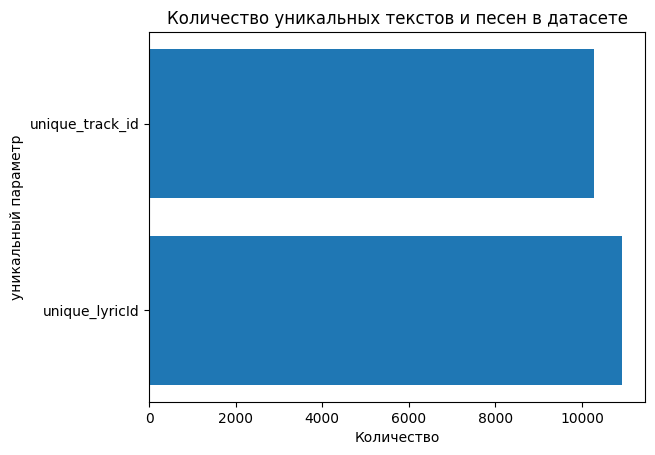

In [15]:
plt.title('Количество уникальных текстов и пеcен в датасете')
plt.barh(['unique_lyricId','unique_track_id'], [len(df_lyrics['lyricId'].unique()), len(df_lyrics['track_id'].unique())])
plt.xlabel('Количество')
plt.ylabel('уникальный параметр')
plt.show()

In [16]:
print(f'Количество строк в датасете lyrics: {df_lyrics.shape[0]}')

Количество строк в датасете lyrics: 11414


In [17]:
print(f'Количество уникльных текстов: {len(df_lyrics["lyricId"].unique())}')

Количество уникльных текстов: 10915


In [18]:
print(f'Количество уникльных треков: {len(df_lyrics["track_id"].unique())}')

Количество уникльных треков: 10277


Количество уникальных треков даже меньше чем количество уникальных текстов. Посмотрим на track_id, которые повторяются

In [19]:
list_duplicate_id = list(df_lyrics[df_lyrics['track_id'].duplicated()]['track_id'].values)

In [20]:
df_lyrics[df_lyrics['track_id'].isin(list_duplicate_id)].sort_values('track_id').head()

,lyricId,text,track_id
10681,039236cf5355b4a81a7d5e689dbbf00a,Hearts go astray\nLeaving hurt when they go\nI...,0021519c8533f1116591948bbb349aef
10686,0abe3bb343894590423064dee2d2a114,Hearts go astray\nLeaving hurt when they go\nI...,0021519c8533f1116591948bbb349aef
10676,745f700051961898c65ffdafd9793584,Hearts go astray\nLeaving hurt when they go\nI...,0021519c8533f1116591948bbb349aef
4796,9ee5ee7522b5b6d045a2d276a040d00c,"If I stay with you, if I'm choosing wrong\nI d...",0102189356af15ad0be804eddd9bc24a
11306,1682f991cfa94d1440bef2aa417edec7,"If I stay with you, if I'm choosing wrong\nI d...",0102189356af15ad0be804eddd9bc24a


Возможно в данных есть какая-то неточность в момент поступления информации и поэтому для одинаковых track_id могут получаться разные lyricId. Удалим столбец lyricId и проверим на дубликаты

In [21]:
df_lyrics = df_lyrics.drop('lyricId', axis=1)

Выведем количество дубликатов

In [22]:
df_lyrics.duplicated().sum()

264

Удалим дубликаты и проверим на повторение данных

In [23]:
df_lyrics = df_lyrics.drop_duplicates()

In [24]:
list_duplicate_id = list(df_lyrics[df_lyrics['track_id'].duplicated()]['track_id'].values)

In [25]:
df_lyrics[df_lyrics['track_id'].isin(list_duplicate_id)].sort_values('track_id').head()

,text,track_id
10676,Hearts go astray\nLeaving hurt when they go\nI...,0021519c8533f1116591948bbb349aef
10681,Hearts go astray\nLeaving hurt when they go\nI...,0021519c8533f1116591948bbb349aef
4796,"If I stay with you, if I'm choosing wrong\nI d...",0102189356af15ad0be804eddd9bc24a
9220,"If I stay with you, if I'm choosing wrong\nI d...",0102189356af15ad0be804eddd9bc24a
11306,"If I stay with you, if I'm choosing wrong\nI d...",0102189356af15ad0be804eddd9bc24a


Тексты всё равно схожи, рассмотрим на примере первых двух строк в чём может быть проблема

In [26]:
df_lyrics[df_lyrics['track_id'].isin(list_duplicate_id)].sort_values('track_id').iloc[0]['text']

"Hearts go astray\nLeaving hurt when they go\nI went away\nJust when you needed me so\n\nFilled with regret\nI come back beggin' you\nForgive, forget\nWhere's the love we once knew?\n\nOpen up your eyes\nThen you'll realize\nHere I stand with my\nEverlastin' love\n\nNeed you by my side\nWanna be your bride\nYou'll never be denied\nEverlastin' love\n\nFrom the very start\nOpen up your heart\nBe a lastin' part of\nEverlastin' love\n(Real love will last forever)\n(Real love will last forever)\n\nWhen life's river flows\nNo one really knows\nTill someone's there to show\nThe way to lastin' love\n\nLike the sun that shines\nEndlessly shines\nYou always will be mine\nIt's eternal love\n\nWhen other loves are gone\nOurs will be strong\nWe have our very own\nEverlastin' love\nLove\n(Real love will last forever)\nLove\n(Real love will last forever)\n\nYou give me, you give me\nYou give me, everlastin' love\nYou give me, you give me\nYou give me, everlastin' love\n\n(You give me, you give me)\n(

In [27]:
df_lyrics[df_lyrics['track_id'].isin(list_duplicate_id)].sort_values('track_id').iloc[1]['text']

"Hearts go astray\nLeaving hurt when they go\nI went away\nJust when you needed me so\nFilled with regret\nI come back beggin' you\nForgive, forget\nWhere's the love we once knew?\nOpen up your eyes\nThen you'll realize\nHere I stand with my\nEverlastin' love\nNeed you by my side\nWanna be your bride\nYou'll never be denied\nEverlastin' love\nFrom the very start\nOpen up your heart\nBe a lastin' part of\nEverlastin' love\n(Real love will last forever)\n(Real love will last forever)\nWhen life's river flows\nNo one really knows\nTill someone's there to show\nThe way to lastin' love\nLike the sun that shines\nEndlessly shines\nYou always will be mine\nIt's eternal love\nWhen other loves are gone\nOurs will be strong\nWe have our very own\nEverlastin' love\nLove\n(Real love will last forever)\nLove\n(Real love will last forever)\nYou give me, you give me\nYou give me, everlastin' love\nYou give me, you give me\nYou give me, everlastin' love\n(You give me, you give me)\n(You give me, everl

Как видим разница состоит в том, что в первом тексте иногда стоит два переноса строк, а во втором один. Приведём весь текст в данном столбце к стандартному виду (сделаем все буквы маленькие, заменим символы переноса, табуляции, скобки на пробел, уберём двойные пробелы и снова проверим датасет на дубликаты)

In [28]:
list_bad_simbol = ['\n\n', '\n', '\t\t', '\t', '(', ')','  ']

In [29]:
for simbol in list_bad_simbol:
    df_lyrics['text'] = df_lyrics['text'].str.replace(simbol, ' ')
df_lyrics['text'] = df_lyrics['text'].str.lower()

Проверим результат

In [30]:
df_lyrics[df_lyrics['track_id'].isin(list_duplicate_id)].sort_values('track_id').iloc[0]['text']

"hearts go astray leaving hurt when they go i went away just when you needed me so filled with regret i come back beggin' you forgive, forget where's the love we once knew? open up your eyes then you'll realize here i stand with my everlastin' love need you by my side wanna be your bride you'll never be denied everlastin' love from the very start open up your heart be a lastin' part of everlastin' love real love will last forever  real love will last forever when life's river flows no one really knows till someone's there to show the way to lastin' love like the sun that shines endlessly shines you always will be mine it's eternal love when other loves are gone ours will be strong we have our very own everlastin' love love real love will last forever love real love will last forever you give me, you give me you give me, everlastin' love you give me, you give me you give me, everlastin' love you give me, you give me  you give me, everlastin' love you know you give it to me everlastin' l

Выведем количество дубликатов

In [31]:
df_lyrics.duplicated().sum()

22

Удалим дубликаты и повторно проверим результат

In [32]:
df_lyrics = df_lyrics.drop_duplicates()
list_duplicate_id = list(df_lyrics[df_lyrics['track_id'].duplicated()]['track_id'].values)
df_lyrics[df_lyrics['track_id'].isin(list_duplicate_id)].sort_values('track_id').head()

,text,track_id
4796,"if i stay with you, if i'm choosing wrong i do...",0102189356af15ad0be804eddd9bc24a
11306,"if i stay with you, if i'm choosing wrong i do...",0102189356af15ad0be804eddd9bc24a
9220,"if i stay with you, if i'm choosing wrong i do...",0102189356af15ad0be804eddd9bc24a
8330,well sometimes i go out by myself and i look a...,02db8e8e8d3c08f3a57cc6db3876f942
591,well sometimes i go out by myself and i look a...,02db8e8e8d3c08f3a57cc6db3876f942


In [33]:
df_lyrics[df_lyrics['track_id'].isin(list_duplicate_id)].sort_values('track_id').iloc[0]['text']

"if i stay with you, if i'm choosing wrong i don't care at all if i'm losing now, but i'm winning late that's all i want now we need some space, 'cause i feel for you and i wanna change growing up alone, it seems so short i can't explain i don't care at all i don't care at all i will be so strong, looking for a new version of myself 'cause now all i want is to be a part of my new world whatever happens in the future, trust in destiny don't try to make anything else even when you feel i don't care at all i don't care at all"

In [34]:
df_lyrics[df_lyrics['track_id'].isin(list_duplicate_id)].sort_values('track_id').iloc[1]['text']

"if i stay with you, if i'm choosing wrong i don't care at all if i'm losing now, but i'm winning late that's all i want now we need some space 'cause i feel for you and i wanna change growing up alone, it seems so short i can't explain whatever happens in the future, trust in destiny, oh-oh, oh-oh don't try to make anything else, even when you feel i don't care at all i don't care at all lost my time, my life is going on i will be so strong, looking for a new version of myself 'cause now all i want is to be a part of my new world whatever happens in the future, trust in destiny don't try to make anything else, even when you feel i don't care at all i don't care at all why not have it all? i don't care at all lost my time, my life is going on lost my time, my life is going on lost my time, my life is going on, ooh-ooh ooh-ooh, ooh-ooh"

In [35]:
df_lyrics[df_lyrics['track_id'].isin(list_duplicate_id)].sort_values('track_id').iloc[2]['text']

"if i stay with you, if i'm choosing wrong i don't care at all if i'm loosing now, but i'm winning late that's all i want now we need some space 'cause i feel for you and i wanna change growing up alone, it seems so short i can't explain whatever happens in the future, trust in destiny don't try to make anything else, even when you feel i don't care at all, i am lost i don't care at all lost my time, my life is going on i will be so strong, looking for a new version of myself 'cause now all i want is to be a part of my new world whatever happens in the future, trust in destiny don't try to make anything else, even when you feel i don't care at all, i am lost i don't care at all why not have it all? i am lone i don't care at all lost my time, my life is going on"

Получается, что в датасете есть песни с одинаковым track_id, но с разными текстами, возможно это связано с вариантами исполнения (студийная запись, концертная и т.д.). Так что единственный вариант, это очищать от дубликатов по track_id.

## Изучение датасета meta

Изучим данные в датасете meta данный датасет содержит следующие столбцы  

- track_id - уникальный идентификатор трека;
- dttm - первая дата появления информации о треке;
- title - название трека;
- language - язык исполнения;
- isrc - международный уникальный идентификатор трека;
- genres - жанры;
- duration - длительность трека;

In [36]:
df_meta = pd.read_json(PATH_META, lines=True, convert_dates=['dttm'])
df_meta.head()

,track_id,dttm,title,language,isrc,genres,duration
0,c3b9d6a354ca008aa4518329aaa21380,2021-12-16 21:00:00,Happy New Year,EN,RUB422103970,[DANCE],161120.0
1,c57e3d13bbbf5322584a7e92e6f1f7ff,2021-11-24 14:00:33,Bad Habits,EN,QZN882178276,[ELECTRONICS],362260.0
2,955f2aafe8717908c140bf122ba4172d,2021-11-24 15:37:03,Por Esa Loca Vanidad,None,QZNJZ2122549,"[FOLK, LATINFOLK]",260000.0
3,fae5a077c9956045955dde02143bd8ff,2021-11-24 15:37:03,Mil Lagrimas,None,QZNJZ2166033,"[FOLK, LATINFOLK]",190000.0
4,6bede082154d34fc18d9a6744bc95bf5,2021-11-24 15:37:03,Sexo Humo y Alcohol,None,QZNJZ2122551,"[FOLK, LATINFOLK]",203000.0


Сразу проверим дубликаты в track_id

In [40]:
df_meta.duplicated(subset='track_id').sum()

0

И в isrc

In [41]:
df_meta.duplicated(subset='isrc').sum()

485

Посмотрим какие треки имеют повторяющийся isrc

In [43]:
list_duplicate_isrc = list(df_meta[df_meta['isrc'].duplicated()]['isrc'].values)
df_meta[df_meta['isrc'].isin(list_duplicate_isrc)].sort_values('isrc').head()

,track_id,dttm,title,language,isrc,genres,duration
27012,be0233f57dbb59079929ac646b0b9d5c,2021-07-06 16:38:30,Zivot da stane ne sme,None,ATAJ12100470,[FOLK],151190.0
26955,8aff9d28865aaf1fa44e46b82cba0f63,2021-07-06 15:38:37,Burma,None,ATAJ12100470,[FOLK],179300.0
51052,196a0973d73122891a426f8334105ce7,2019-03-29 21:00:00,Inní mér syngur vitleysingur,EN,ATN261668711,"[FOLKMETAL, METAL]",237010.0
66395,425761c88ebc69e89c748eb537671953,2018-04-28 19:08:26,Inni Mer Syngur Vitleysingur,None,ATN261668711,"[FOLKMETAL, METAL]",237010.0
66396,466df43223bcc7e5d0973e9038890fb7,2018-04-28 19:08:26,Nattfodd,None,ATN261668712,"[FOLKMETAL, METAL]",255380.0


Получились весьма неоднозначные данные. У нас есть дубликаты в уникальном идентификаторе, но при этом могут отличаться даже названия песен, может отсутствовать метка языка (это может быть связано как с тем, что это инструментальное исполнение, так и с тем, что данных по языку отсутствуют)

Построим гистограмму распространения языка.

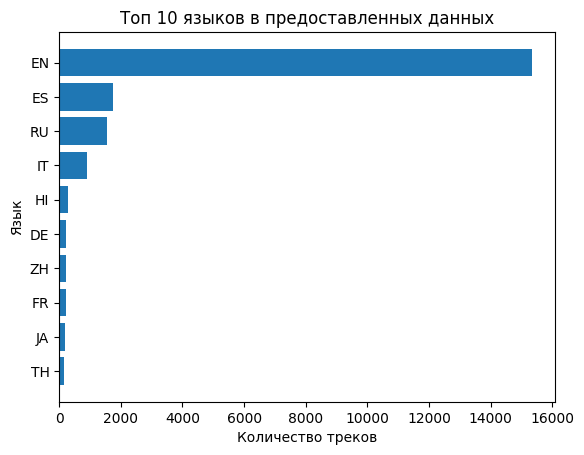

In [60]:
df_group = df_meta['language'].value_counts(ascending=True).reset_index()
df_group = df_group.tail(10)
plt.title('Топ 10 языков в предоставленных данных')
plt.barh(df_group['language'], df_group['count'])
plt.xlabel('Количество треков')
plt.ylabel('Язык')
plt.show()

Как видим наиболее часто в данных встречаются треки на английском, значительно реже на испанском, русском и итальянском.

Выведем количество строк в которых язык не указан.

In [61]:
df_meta['language'].isna().sum()

49800

У нас почти 50000 строк без указания языка и это как-то необходимо будет обработать